In [ ]:
# https://github.com/PiyushM1/Car-make-model-and-year-classifier/blob/master/Car_make_model_year_classifier.ipynb

In [ ]:
!mkdir drive/MyDrive/ColabNotebooks/final/data 

In [ ]:
#@title Download data
! wget "http://imagenet.stanford.edu/internal/car196/cars_train.tgz"
! tar -xvf 'cars_train.tgz' -C 'drive/MyDrive/ColabNotebooks/final/data'

Streaming output truncated to the last 5000 lines.
cars_train/03145.jpg
cars_train/03146.jpg
cars_train/03147.jpg
cars_train/03148.jpg
cars_train/03149.jpg
cars_train/03150.jpg
cars_train/03151.jpg
cars_train/03152.jpg
cars_train/03153.jpg
cars_train/03154.jpg
cars_train/03155.jpg
cars_train/03156.jpg
cars_train/03157.jpg
cars_train/03158.jpg
cars_train/03159.jpg
cars_train/03160.jpg
cars_train/03161.jpg
cars_train/03162.jpg
cars_train/03163.jpg
cars_train/03164.jpg
cars_train/03165.jpg
cars_train/03166.jpg
cars_train/03167.jpg
cars_train/03168.jpg
cars_train/03169.jpg
cars_train/03170.jpg
cars_train/03171.jpg
cars_train/03172.jpg
cars_train/03173.jpg
cars_train/03174.jpg
cars_train/03175.jpg
cars_train/03176.jpg
cars_train/03177.jpg
cars_train/03178.jpg
cars_train/03179.jpg
cars_train/03180.jpg
cars_train/03181.jpg
cars_train/03182.jpg
cars_train/03183.jpg
cars_train/03184.jpg
cars_train/03185.jpg
cars_train/03186.jpg
cars_train/03187.jpg
cars_train/03188.jpg
cars_train/03189.jpg
cars

# New Section

In [ ]:
! wget "https://ai.stanford.edu/~jkrause/cars/car_devkit.tgz"
! tar -xvf 'car_devkit.tgz' -C 'drive/MyDrive/ColabNotebooks/final/data'

tar: car_devkit.tgz: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now


In [ ]:
! wget "http://imagenet.stanford.edu/internal/car196/cars_test.tgz"
! tar -xvf 'cars_test.tgz' -C 'drive/MyDrive/ColabNotebooks/final/data'

In [ ]:
! wget "http://imagenet.stanford.edu/internal/car196/cars_test_annos_withlabels.mat" -P 'drive/MyDrive/ColabNotebooks/final/data/devkit'


--2021-04-15 10:39:15--  http://imagenet.stanford.edu/internal/car196/cars_test_annos_withlabels.mat
Resolving imagenet.stanford.edu (imagenet.stanford.edu)... 171.64.68.16
Connecting to imagenet.stanford.edu (imagenet.stanford.edu)|171.64.68.16|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 185758 (181K) [text/plain]
Saving to: ‘drive/MyDrive/ColabNotebooks/final/data/devkit/cars_test_annos_withlabels.mat’

cars_test_annos_wit 100%[===================>] 181.40K   405KB/s    in 0.4s    

2021-04-15 10:39:15 (405 KB/s) - ‘drive/MyDrive/ColabNotebooks/final/data/devkit/cars_test_annos_withlabels.mat’ saved [185758/185758]



In [ ]:
from scipy import io
import pandas as pd


In [ ]:
class_name=io.loadmat('drive/MyDrive/ColabNotebooks/final/data/devkit/cars_meta.mat')

In [ ]:
#@title split make,year,model and add to combine
combined=[]
for name in class_name['class_names'][0]:
  name=name.flat[0]
  splits=name.split(" ")
  make=splits[0]
  year=splits[len(splits)-1]
  model=""
  for tmp in splits[1:len(splits)-2]:
    model=model+tmp+"_"
    print(model)
  combined.append([make,model,year])

In [ ]:
print("ID\t"+"{:<20}".format("Make")+"{:<20}".format("Model")+"{:<20}".format("Year"))
for i in range(50,70):
  print(str(i)+"\t "+"{:<20}".format(combined[i][0])+"{:<20}".format(combined[i][1])+"{:<20}".format(combined[i][2]))

In [ ]:
train_labels=io.loadmat("./drive/MyDrive/ColabNotebooks/final/data/devkit/cars_train_annos.mat")
test_labels=io.loadmat("./drive/MyDrive/ColabNotebooks/final/data/devkit/cars_test_annos_withlabels.mat")


In [ ]:
def makecsv(labels,path):
  data=[[row.flat[0] for row in line][4:] for line in labels['annotations'][0]]
  make = [[row[1],combined[row[0]-1][0]] for row in data]
  model= [[row[1],combined[row[0]-1][1]] for row in data]
  year = [[row[1],combined[row[0]-1][2]] for row in data]

  df = pd.DataFrame(make, columns = ['ID', 'Labels'])
  df.to_csv(path+"make.csv", index = False)
  df = pd.DataFrame(model, columns = ['ID', 'Labels'])
  df.to_csv(path+"model.csv", index = False)
  df = pd.DataFrame(year, columns = ['ID', 'Labels'])
  df.to_csv(path+"year.csv", index = False)

In [ ]:
makecsv(train_labels,"./drive/MyDrive/ColabNotebooks/final/data/cars_train_")
makecsv(test_labels,"./drive/MyDrive/ColabNotebooks/final/data/cars_test_")


In [ ]:
# ! wget "http://imagenet.stanford.edu/internal/car196/cars_test_annos_withlabels.mat" -P './data/devkit'


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt


In [ ]:
# train=

In [ ]:
# f,ax=plt.subplot(2,2)
# for i,j in (2,2):
#   ax[i,j].imshow()


# Read labbel form csv

In [1]:
import pandas as pd

path="./drive/MyDrive/ColabNotebooks/final/data/"

data_train_make=pd.read_csv((path+"cars_train_make.csv"))
data_train_year=pd.read_csv((path+"cars_train_year.csv"))
data_train_model=pd.read_csv((path+"cars_train_model.csv"))



data_test_make=pd.read_csv((path+"cars_test_make.csv"))
data_test_model=pd.read_csv((path+"cars_test_model.csv"))
data_test_year=pd.read_csv((path+"cars_test_year.csv"))


In [2]:
data_test_make.head()

,ID,Labels
0,00001.jpg,Suzuki
1,00002.jpg,Ferrari
2,00003.jpg,Jeep
3,00004.jpg,Toyota
4,00005.jpg,Tesla


In [3]:
import matplotlib.image as mimg
import matplotlib.pyplot as plt


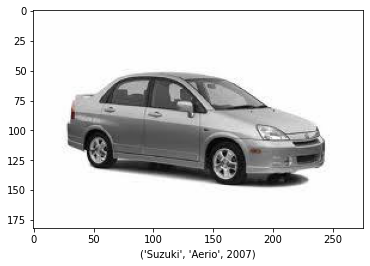

In [4]:
img=plt.imread('drive/MyDrive/ColabNotebooks/final/data/cars_test/00001.jpg')
plt.imshow(img)
plt.xlabel((data_test_make.Labels[0],data_test_model.Labels[0].replace("_",""),data_test_year.Labels[0]))
plt.show()

**Train Model car-model**

---



In [5]:
import numpy as np
len(np.unique(data_train_make.Labels))

49

# Download pre-trained model InceptionV3

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O ./inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2021-04-16 05:47:44--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.164.176, 142.250.73.208, 142.250.65.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.164.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘./inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

./inception_v3_weig 100%[===================>]  83.84M   173MB/s    in 0.5s    

2021-04-16 05:47:45 (173 MB/s) - ‘./inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#load model pre-trained
pre_trained=InceptionV3(input_shape=(150,150,3),include_top=False,weights=None)
model_path='inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained.load_weights(model_path)

In [ ]:
pre_trained.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
for layer in pre_trained.layers:
  layer.trainable=False

In [ ]:

from keras.utils.vis_utils import plot_model
plot_model(pre_trained,to_file="model_pre_trained.png",show_shapes=True,show_layer_names=True)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Chọn layer mixed0 gắn thêm lớp phân loại

last_layer=pre_trained.get_layer("mixed0")
last_output=last_layer.output

In [ ]:
last_output

<KerasTensor: shape=(None, 16, 16, 256) dtype=float32 (created by layer 'mixed0')>

In [ ]:
from tensorflow.keras.optimizers import RMSprop

a=layers.Flatten()(last_output)

a=layers.Dense(1024,activation="relu")(a)

a=layers.Dropout(0.2)(a)
a=layers.Dense(49,activation='softmax')(a)

model=Model(pre_trained.input,a)
model.compile(optimizer=RMSprop(learning_rate=0.001),loss='binary_crossentropy',metrics=['acc'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

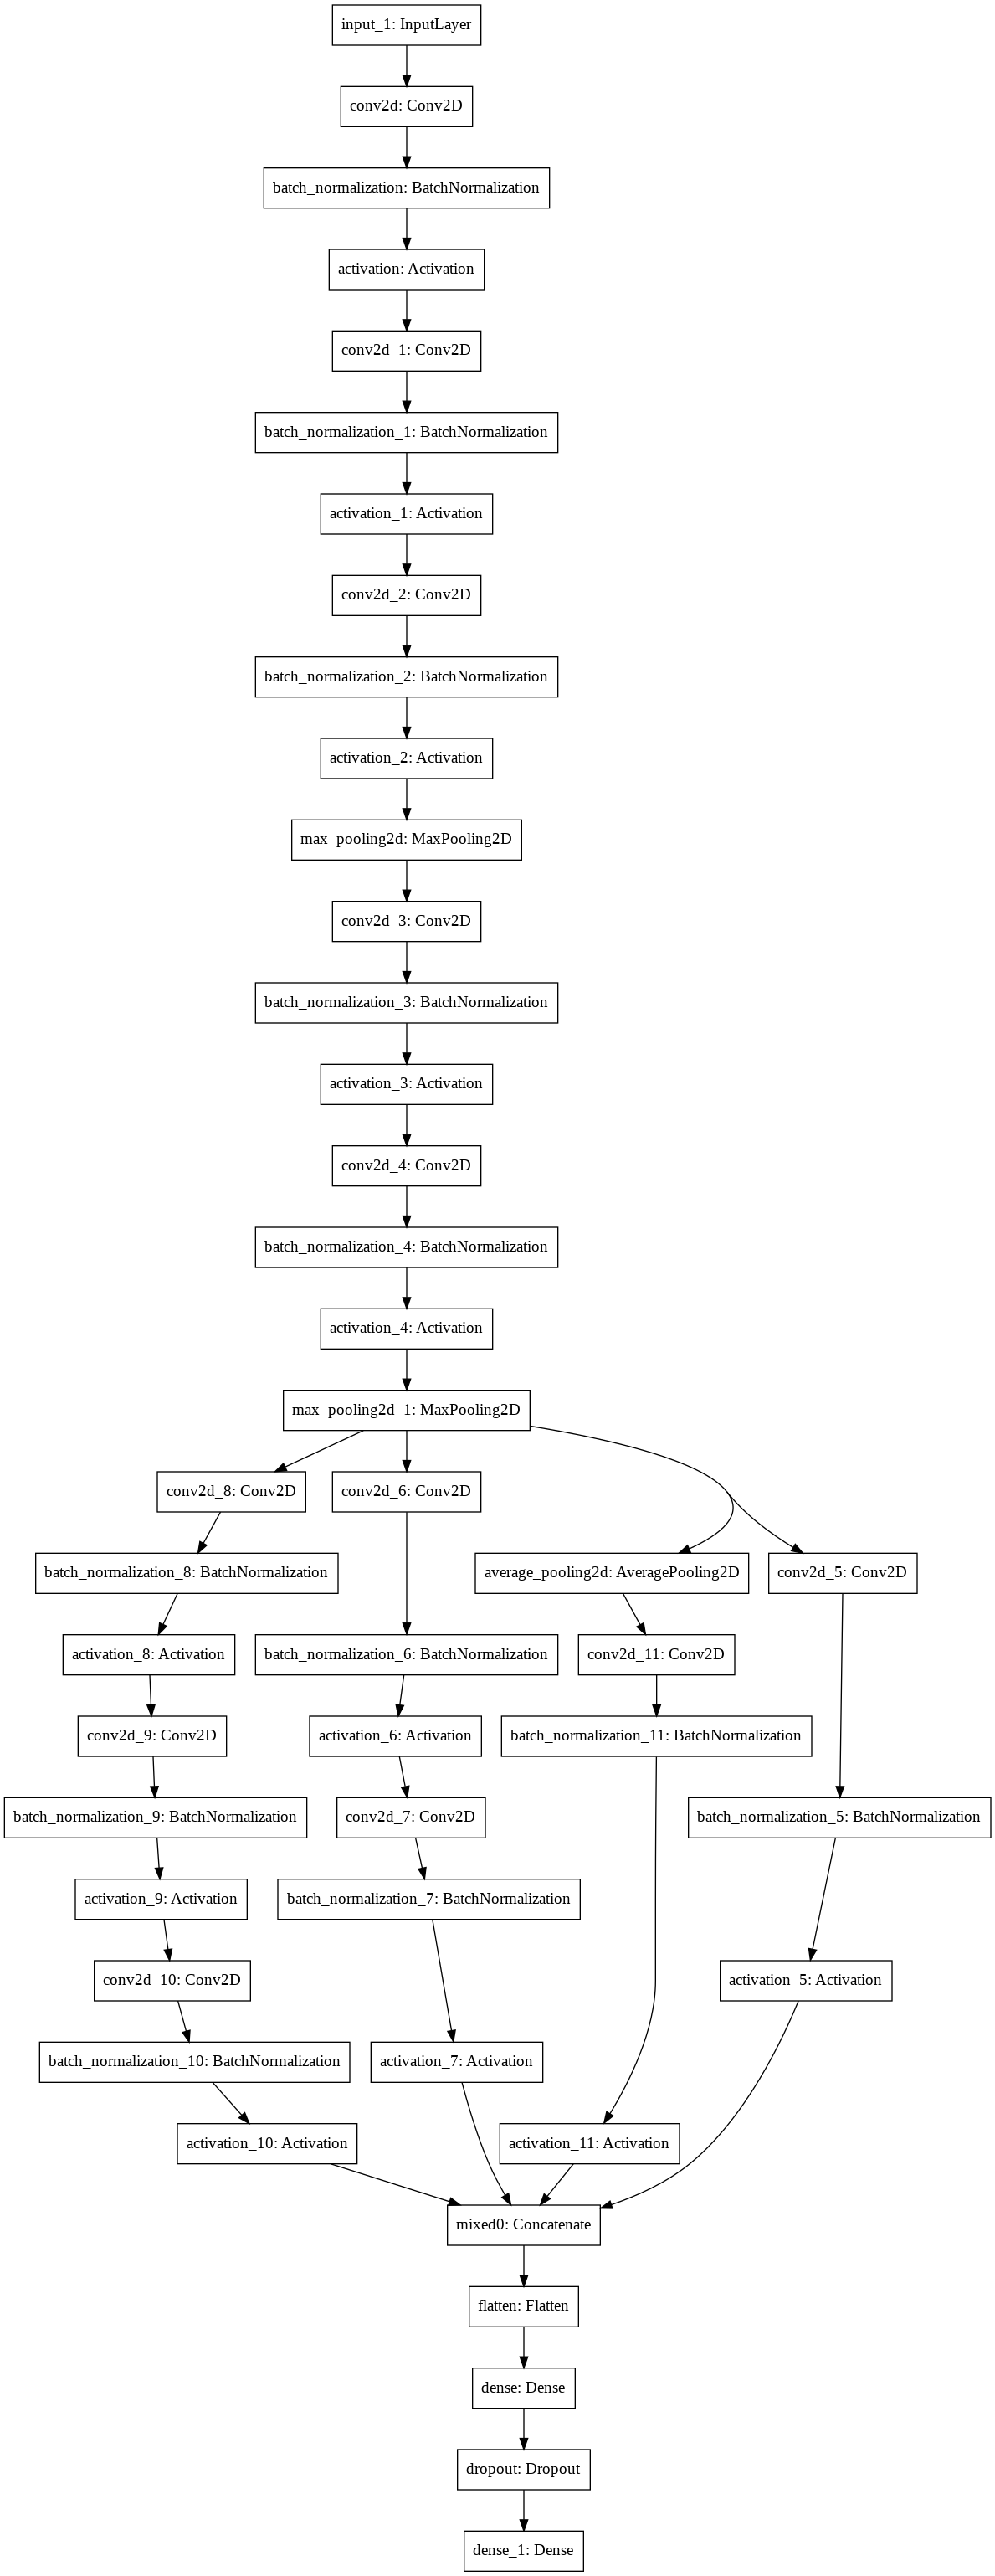

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

In [ ]:
from keras.preprocessing import image
from tqdm import tqdm
from os import listdir
from os.path import isfile,join
fileImageTrain=[f for f in listdir('/content/drive/MyDrive/ColabNotebooks/final/data/cars_train/') if isfile(join('/content/drive/MyDrive/ColabNotebooks/final/data/cars_train/',f))]

In [ ]:
from os import walk
x=[]
_, _, filenames = next(walk('/content/drive/MyDrive/ColabNotebooks/final/data/cars_train/'))
for filename in filenames:
  x.append(join('/content/drive/MyDrive/ColabNotebooks/final/data/cars_train/',filename))

In [ ]:
x

['/content/drive/MyDrive/ColabNotebooks/final/data/cars_train/00328.jpg',
 '/content/drive/MyDrive/ColabNotebooks/final/data/cars_train/00329.jpg',
 '/content/drive/MyDrive/ColabNotebooks/final/data/cars_train/00330.jpg',
 '/content/drive/MyDrive/ColabNotebooks/final/data/cars_train/00331.jpg',
 '/content/drive/MyDrive/ColabNotebooks/final/data/cars_train/00332.jpg',
 '/content/drive/MyDrive/ColabNotebooks/final/data/cars_train/00333.jpg',
 '/content/drive/MyDrive/ColabNotebooks/final/data/cars_train/00334.jpg',
 '/content/drive/MyDrive/ColabNotebooks/final/data/cars_train/00335.jpg',
 '/content/drive/MyDrive/ColabNotebooks/final/data/cars_train/00336.jpg',
 '/content/drive/MyDrive/ColabNotebooks/final/data/cars_train/00337.jpg',
 '/content/drive/MyDrive/ColabNotebooks/final/data/cars_train/00338.jpg',
 '/content/drive/MyDrive/ColabNotebooks/final/data/cars_train/00339.jpg',
 '/content/drive/MyDrive/ColabNotebooks/final/data/cars_train/00340.jpg',
 '/content/drive/MyDrive/ColabNotebook

In [ ]:
image_train=[]
for i in tqdm(range(data_train_make.shape[0])):
  img=image.load_img(x[i],target_size=(256,256,3))
  img=image.img_to_array(img)
  img=img/255.
  image_train.append(img)
X=np.array(image_train)

 94%|█████████▍| 7688/8144 [35:31<02:13,  3.42it/s]

In [ ]:
model.fit(train_generator,test_generator)

ValueError: ignored

# create model CNN for training

In [6]:
train_folder='drive/MyDrive/ColabNotebooks/final/data/cars_train'
valid_folder='drive/MyDrive/ColabNotebooks/final/data/cars_test'

In [7]:
from keras_preprocessing.image import ImageDataGenerator

In [8]:
val_data_make=data_test_make[:5000]
test_data_make=data_test_make[5000:]

In [9]:
#@title Data generator with Image 
datagen=ImageDataGenerator(rescale=1./255.)
test_datagen=ImageDataGenerator(rescale=1./255.)

train_generator=datagen.flow_from_dataframe(
    dataframe=data_train_make,
    directory=train_folder,
    x_col="ID",
    y_col='Labels',
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode="categorical"
)

valid_generator=test_datagen.flow_from_dataframe(
    dataframe=val_data_make,
    directory=valid_folder,
    x_col="ID",
    y_col='Labels',
    batch_size=32,
    seed=42,
    
    shuffle=True,
    class_mode="categorical"
)
test_generator=test_datagen.flow_from_dataframe(
    dataframe=test_data_make,
    directory=valid_folder,
    x_col="ID",
    # y_col='Labels',
    batch_size=32,
    seed=42,
    shuffle=False,
    class_mode=None
)

Found 8144 validated image filenames belonging to 49 classes.
Found 5000 validated image filenames belonging to 49 classes.
Found 3041 validated image filenames.


In [ ]:
label_map=(train_generator.class_indices)
label_map

{'AM': 0,
 'Acura': 1,
 'Aston': 2,
 'Audi': 3,
 'BMW': 4,
 'Bentley': 5,
 'Bugatti': 6,
 'Buick': 7,
 'Cadillac': 8,
 'Chevrolet': 9,
 'Chrysler': 10,
 'Daewoo': 11,
 'Dodge': 12,
 'Eagle': 13,
 'FIAT': 14,
 'Ferrari': 15,
 'Fisker': 16,
 'Ford': 17,
 'GMC': 18,
 'Geo': 19,
 'HUMMER': 20,
 'Honda': 21,
 'Hyundai': 22,
 'Infiniti': 23,
 'Isuzu': 24,
 'Jaguar': 25,
 'Jeep': 26,
 'Lamborghini': 27,
 'Land': 28,
 'Lincoln': 29,
 'MINI': 30,
 'Maybach': 31,
 'Mazda': 32,
 'McLaren': 33,
 'Mercedes-Benz': 34,
 'Mitsubishi': 35,
 'Nissan': 36,
 'Plymouth': 37,
 'Porsche': 38,
 'Ram': 39,
 'Rolls-Royce': 40,
 'Scion': 41,
 'Spyker': 42,
 'Suzuki': 43,
 'Tesla': 44,
 'Toyota': 45,
 'Volkswagen': 46,
 'Volvo': 47,
 'smart': 48}

In [ ]:
# classes_train_generator=train_generator.classes
import numpy as np

print(np.unique(classes_train_generator))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]


In [10]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Dense,Activation,Flatten
from tensorflow.keras import Sequential,optimizers
from tensorflow.keras.optimizers import RMSprop,Adam

In [12]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(256,256,3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(49, activation='softmax'))
model.compile(optimizers.Adam(lr=0.0001, epsilon=1e-6),loss="binary_crossentropy",metrics=["accuracy"])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 256, 256, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 254, 254, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 127, 127, 64)      1

In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
254/254 [==============================] - 6242s 24s/step - loss: 0.1594 - accuracy: 0.0448 - val_loss: 0.1383 - val_accuracy: 0.1230
Epoch 2/10
254/254 [==============================] - 163s 639ms/step - loss: 0.1043 - accuracy: 0.0741 - val_loss: 0.1445 - val_accuracy: 0.1380
Epoch 3/10
254/254 [==============================] - 163s 643ms/step - loss: 0.0967 - accuracy: 0.0947 - val_loss: 0.1210 - val_accuracy: 0.1366
Epoch 4/10
254/254 [==============================] - 165s 649ms/step - loss: 0.0895 - accuracy: 0.1320 - val_loss: 0.1111 - val_accuracy: 0.1368
Epoch 5/10
254/254 [==============================] - 165s 651ms/step - loss: 0.0786 - accuracy: 0.2399 - val_loss: 0.1014 - val_accuracy: 0.1348
Epoch 6/10
254/254 [==============================] - 164s 646ms/step - loss: 0.0594 - accuracy: 0.4540 - val_loss: 0.0996 - val_accuracy: 0.1354
Epoch 7/10
254/254 [==============================] - 165s 652ms/step - loss: 0.0411 - accuracy: 0.6683 - val_loss: 0.1021 - 

In [ ]:
model.save("/content/drive/MyDrive/ColabNotebooks/final/car-model.h5")

In [ ]:
test_generator.reset()
pred=model.predict_generator(test_generator,steps=STEP_SIZE_TEST,verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


95/95 [==============================] - 30s 313ms/step


In [ ]:
pred

array([[4.25383905e-06, 4.55072674e-04, 6.70700786e-07, ...,
        9.56877193e-04, 3.61989805e-04, 2.66953407e-07],
       [4.25756525e-06, 4.19226056e-03, 5.09356414e-06, ...,
        7.50670952e-05, 2.01592411e-05, 7.97275774e-08],
       [7.52805063e-05, 7.73622766e-02, 1.36468513e-02, ...,
        3.63784023e-02, 7.90851843e-03, 1.06022262e-03],
       ...,
       [4.01655997e-09, 8.83345056e-05, 1.12808986e-04, ...,
        6.21410363e-05, 1.82560907e-05, 3.21575877e-09],
       [3.60718434e-04, 1.71575765e-03, 1.47456230e-04, ...,
        1.38745131e-03, 2.82107247e-03, 1.37141571e-04],
       [7.76045062e-10, 7.98403926e-06, 3.67717888e-07, ...,
        2.28178024e-07, 4.32324896e-07, 7.40194306e-09]], dtype=float32)

In [ ]:
len(pred)

3040

In [ ]:
img1='/content/drive/MyDrive/ColabNotebooks/final/data/cars_test/00002.jpg'

In [ ]:
from PIL import Image

In [ ]:
img=Image.open(img1)
img=img.resize(size=(256,256))

In [ ]:
import numpy as np

In [ ]:
img=np.asarray(img)

In [ ]:
img=img/255.

In [ ]:
img=np.expand_dims(img,0)

In [ ]:
pred=model.predict(img)

In [ ]:
img.shape

(1, 256, 256, 3)

In [ ]:
pred1=pred.flatten()

In [ ]:
pred1

array([2.7723529e-04, 5.9459067e-04, 2.3062390e-04, 7.1781420e-04,
       3.3316161e-03, 6.7960902e-04, 1.6362656e-05, 4.6290173e-05,
       1.6645332e-04, 2.6105102e-03, 5.5418618e-04, 4.6788646e-06,
       3.2382219e-03, 2.5502930e-05, 5.3552864e-03, 6.3976062e-05,
       1.4043807e-05, 1.4698932e-01, 9.7287977e-03, 1.9895547e-06,
       2.9984408e-04, 1.5294889e-05, 1.8345079e-01, 3.3356798e-07,
       2.2766972e-05, 2.4524832e-04, 2.4003357e-04, 3.0639719e-03,
       1.2001558e-03, 6.8608833e-06, 2.0746713e-06, 6.8598281e-05,
       3.4374931e-05, 2.8765047e-05, 9.7901071e-04, 9.9033355e-07,
       3.5899862e-05, 7.0718011e-07, 3.4549146e-06, 2.3410466e-05,
       1.8902964e-04, 2.8427221e-05, 7.2666517e-05, 1.0857154e-04,
       2.5295350e-05, 1.3795067e-04, 8.0648926e-05, 2.1480987e-02,
       1.9225005e-05], dtype=float32)

In [ ]:
np.unique(data_train_make.Labels)

array(['AM', 'Acura', 'Aston', 'Audi', 'BMW', 'Bentley', 'Bugatti',
       'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Daewoo', 'Dodge',
       'Eagle', 'FIAT', 'Ferrari', 'Fisker', 'Ford', 'GMC', 'Geo',
       'HUMMER', 'Honda', 'Hyundai', 'Infiniti', 'Isuzu', 'Jaguar',
       'Jeep', 'Lamborghini', 'Land', 'Lincoln', 'MINI', 'Maybach',
       'Mazda', 'McLaren', 'Mercedes-Benz', 'Mitsubishi', 'Nissan',
       'Plymouth', 'Porsche', 'Ram', 'Rolls-Royce', 'Scion', 'Spyker',
       'Suzuki', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo', 'smart'],
      dtype=object)

In [ ]:
label_map=['AM', 'Acura', 'Aston', 'Audi', 'BMW', 'Bentley', 'Bugatti',
       'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Daewoo', 'Dodge',
       'Eagle', 'FIAT', 'Ferrari', 'Fisker', 'Ford', 'GMC', 'Geo',
       'HUMMER', 'Honda', 'Hyundai', 'Infiniti', 'Isuzu', 'Jaguar',
       'Jeep', 'Lamborghini', 'Land', 'Lincoln', 'MINI', 'Maybach',
       'Mazda', 'McLaren', 'Mercedes-Benz', 'Mitsubishi', 'Nissan',
       'Plymouth', 'Porsche', 'Ram', 'Rolls-Royce', 'Scion', 'Spyker',

       'Suzuki', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo', 'smart']

In [ ]:
result={}
for i in range(len(label_map)):
  result[label_map[i]]=pred1[i]

In [ ]:
sorted(result.items(), key=lambda x: x[1],reverse=True)


[('Hyundai', 0.18345079),
 ('Ford', 0.14698932),
 ('Volvo', 0.021480987),
 ('GMC', 0.009728798),
 ('FIAT', 0.0053552864),
 ('BMW', 0.003331616),
 ('Dodge', 0.0032382219),
 ('Lamborghini', 0.0030639719),
 ('Chevrolet', 0.0026105102),
 ('Land', 0.0012001558),
 ('Mercedes-Benz', 0.0009790107),
 ('Audi', 0.0007178142),
 ('Bentley', 0.000679609),
 ('Acura', 0.0005945907),
 ('Chrysler', 0.0005541862),
 ('HUMMER', 0.00029984408),
 ('AM', 0.0002772353),
 ('Jaguar', 0.00024524832),
 ('Jeep', 0.00024003357),
 ('Aston', 0.0002306239),
 ('Rolls-Royce', 0.00018902964),
 ('Cadillac', 0.00016645332),
 ('Toyota', 0.00013795067),
 ('Suzuki', 0.00010857154),
 ('Volkswagen', 8.0648926e-05),
 ('Spyker', 7.266652e-05),
 ('Maybach', 6.859828e-05),
 ('Ferrari', 6.397606e-05),
 ('Buick', 4.6290173e-05),
 ('Nissan', 3.5899862e-05),
 ('Mazda', 3.437493e-05),
 ('McLaren', 2.8765047e-05),
 ('Scion', 2.8427221e-05),
 ('Eagle', 2.550293e-05),
 ('Tesla', 2.529535e-05),
 ('Ram', 2.3410466e-05),
 ('Isuzu', 2.2766972e-

In [ ]:
for i in range(len(label_map)):
  print(pred[i])

[2.7723529e-04 5.9459067e-04 2.3062390e-04 7.1781420e-04 3.3316161e-03
 6.7960902e-04 1.6362656e-05 4.6290173e-05 1.6645332e-04 2.6105102e-03
 5.5418618e-04 4.6788646e-06 3.2382219e-03 2.5502930e-05 5.3552864e-03
 6.3976062e-05 1.4043807e-05 1.4698932e-01 9.7287977e-03 1.9895547e-06
 2.9984408e-04 1.5294889e-05 1.8345079e-01 3.3356798e-07 2.2766972e-05
 2.4524832e-04 2.4003357e-04 3.0639719e-03 1.2001558e-03 6.8608833e-06
 2.0746713e-06 6.8598281e-05 3.4374931e-05 2.8765047e-05 9.7901071e-04
 9.9033355e-07 3.5899862e-05 7.0718011e-07 3.4549146e-06 2.3410466e-05
 1.8902964e-04 2.8427221e-05 7.2666517e-05 1.0857154e-04 2.5295350e-05
 1.3795067e-04 8.0648926e-05 2.1480987e-02 1.9225005e-05]


IndexError: ignored

In [ ]:
import pandas as pd
import numpy as np

train_make=pd.read_csv("/content/drive/MyDrive/ColabNotebooks/final/data/cars_train_make.csv")

In [ ]:
label=np.unique(train_make.Labels)
label

array(['AM', 'Acura', 'Aston', 'Audi', 'BMW', 'Bentley', 'Bugatti',
       'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Daewoo', 'Dodge',
       'Eagle', 'FIAT', 'Ferrari', 'Fisker', 'Ford', 'GMC', 'Geo',
       'HUMMER', 'Honda', 'Hyundai', 'Infiniti', 'Isuzu', 'Jaguar',
       'Jeep', 'Lamborghini', 'Land', 'Lincoln', 'MINI', 'Maybach',
       'Mazda', 'McLaren', 'Mercedes-Benz', 'Mitsubishi', 'Nissan',
       'Plymouth', 'Porsche', 'Ram', 'Rolls-Royce', 'Scion', 'Spyker',
       'Suzuki', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo', 'smart'],
      dtype=object)

In [ ]:
a={}
for i in label:
  a[i]=train_make[train_make.Labels==i].count().sum()

In [ ]:
b={}
# for i in range(len(label)):
  # b[label[i]]=np.array(train_generator.labels)[train_generator.labels==i].sum()
for i in range(len(label)):
  print(train_generator_dataframe.groupby(i).count())

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]


KeyError: ignored

In [ ]:
train_generator_dataframe=pd.DataFrame(np.array(train_generator.labels),columns=["a"])
train_generator_dataframe

,a
0,3
1,1
2,12
3,22
4,17
...,...
8139,10
8140,48
8141,34
8142,17


In [ ]:
b={}
for i in range(len(label)):
  b[label[i]]=train_generator_dataframe.a[train_generator_dataframe.a==i].count()
  # print(train_generator_dataframe.a[train_generator_dataframe.a==i].count())
b

{'AM': 45,
 'Acura': 242,
 'Aston': 157,
 'Audi': 589,
 'BMW': 531,
 'Bentley': 238,
 'Bugatti': 77,
 'Buick': 158,
 'Cadillac': 129,
 'Chevrolet': 905,
 'Chrysler': 260,
 'Daewoo': 45,
 'Dodge': 630,
 'Eagle': 46,
 'FIAT': 62,
 'Ferrari': 164,
 'Fisker': 44,
 'Ford': 521,
 'GMC': 238,
 'Geo': 45,
 'HUMMER': 83,
 'Honda': 161,
 'Hyundai': 438,
 'Infiniti': 67,
 'Isuzu': 40,
 'Jaguar': 47,
 'Jeep': 220,
 'Lamborghini': 161,
 'Land': 86,
 'Lincoln': 39,
 'MINI': 37,
 'Maybach': 29,
 'Mazda': 36,
 'McLaren': 44,
 'Mercedes-Benz': 261,
 'Mitsubishi': 48,
 'Nissan': 171,
 'Plymouth': 44,
 'Porsche': 44,
 'Ram': 41,
 'Rolls-Royce': 114,
 'Scion': 42,
 'Spyker': 88,
 'Suzuki': 167,
 'Tesla': 39,
 'Toyota': 168,
 'Volkswagen': 132,
 'Volvo': 131,
 'smart': 40}

In [ ]:
a=pd.DataFrame.from_dict(a,orient='index')

In [ ]:
b=pd.DataFrame.from_dict(b,orient='index')

In [ ]:
np.array(train_generator.labels)

array([ 3,  1, 12, ..., 34, 17,  3])

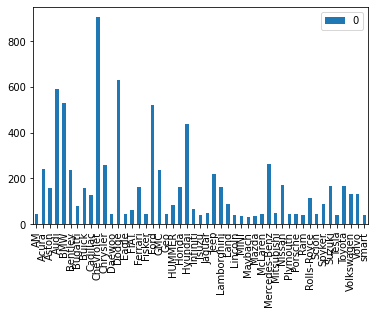

In [ ]:
b.plot.bar()

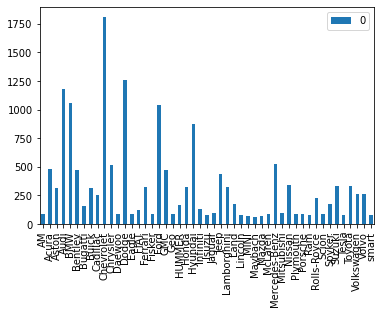

In [ ]:
a.plot.bar()

In [ ]:
min(a[0])

58